In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
train = pd.read_csv("Train.csv")

In [26]:
train.head().T

,0,1,2,3,4
Applicant_ID,Apcnt_1000000,Apcnt_1000004,Apcnt_1000008,Apcnt_1000012,Apcnt_1000016
form_field1,3436,3456,3276,3372,3370
form_field2,0.28505,0.674,0.53845,0.17005,0.7727
form_field3,1.656,0.2342,3.151,0.505,1.101
form_field4,0,0,0,0,0
form_field5,0,0,6.282,0,0
form_field6,0,0,NaN,192166,1556
form_field7,1.06897e+07,898979,956940,3.0447e+06,214728
form_field8,252072,497531,NaN,385499,214728
form_field9,4.27278e+06,9.07381e+06,192944,3.98647e+06,1.28409e+06


In [4]:
test = pd.read_csv("Test.csv")

In [5]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [7]:
train.shape

(56000, 52)

In [8]:
train["default_status"].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

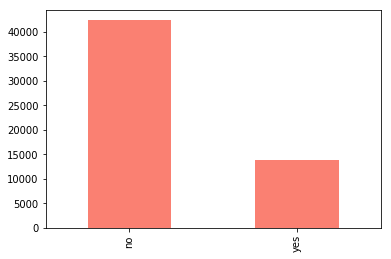

In [10]:
train["default_status"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [13]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [14]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [15]:
train_1_to_10 = train.drop(["form_field1", "form_field2", "form_field3", "form_field4", "form_field5", "form_field6", 
                      "form_field7", "form_field8", "form_field9", "form_field10", "form_field11", "form_field10", "form_field10", 
                      "form_field11", "form_field12", "form_field13", "form_field14", "form_field15", "form_field16",
                      "form_field17", "form_field18", "form_field19", "form_field20", "form_field21", "form_field22"], axis = 1)

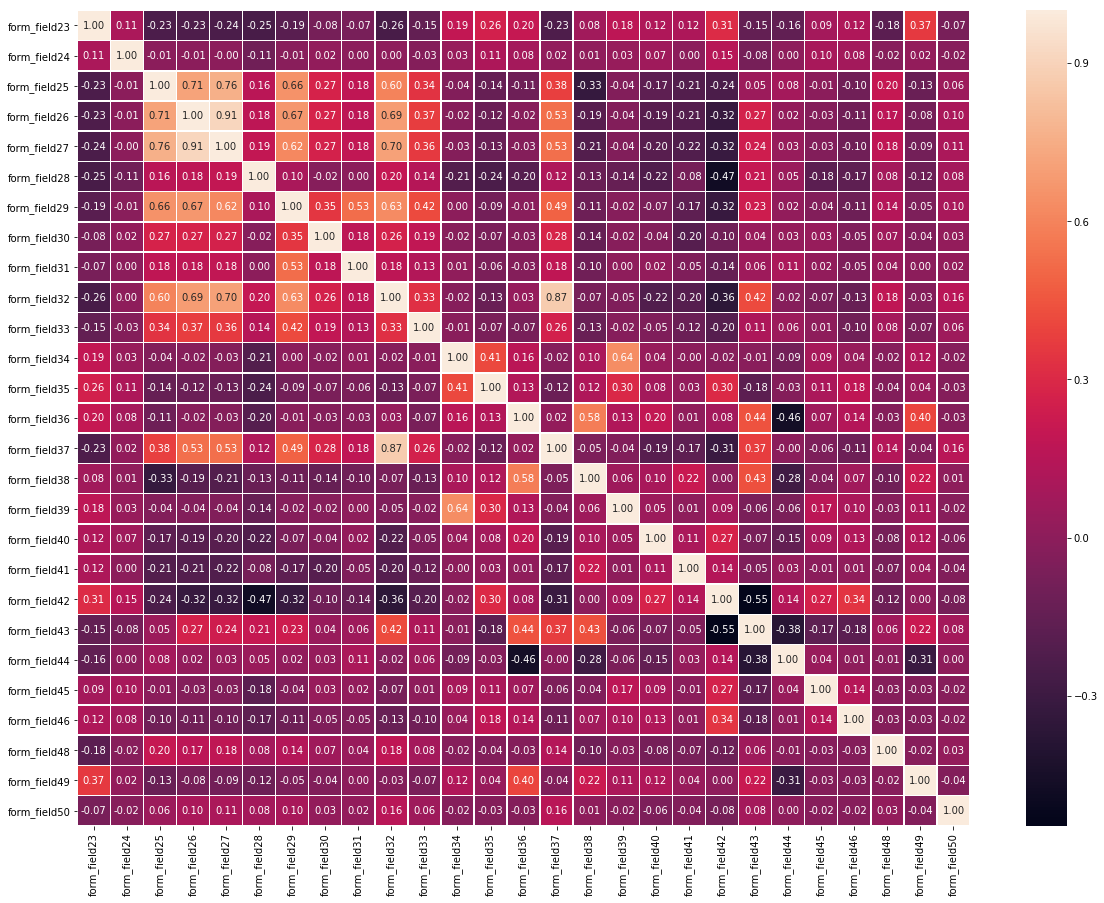

In [17]:
corr_matrix = train_1_to_10.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt= ".2f",
                #cmap = "YIGnBu"
                );

In [18]:
train_1_to_10["form_field23"] = train["form_field23"]
train_1_to_10["form_field51"] = pd.Categorical(train_1_to_10["default_status"]).codes

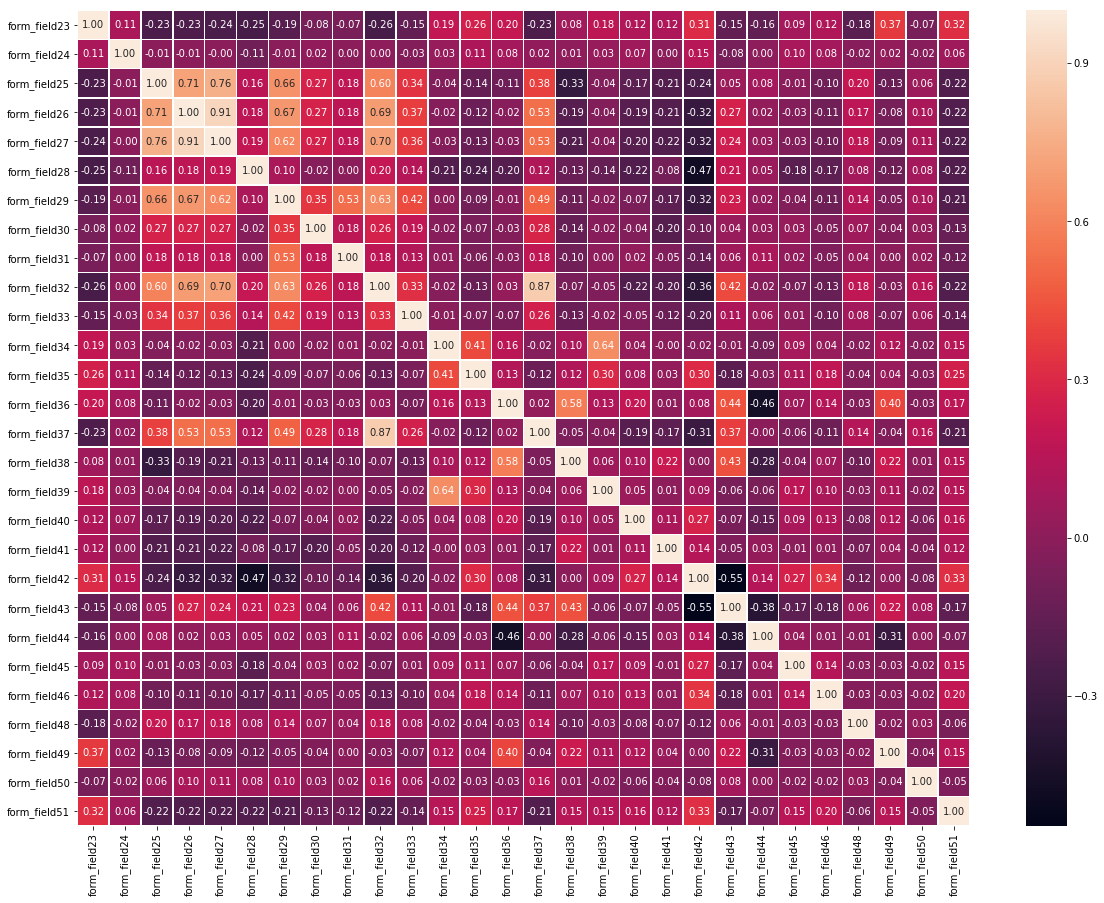

In [19]:
corr_matrix = train_1_to_10.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt= ".2f",
                #cmap = "YIGnBu"
                );

In [21]:
train_another = train.drop(["form_field23", "form_field24", "form_field25", "form_field26", "form_field27", "form_field28", 
                      "form_field29", "form_field30", "form_field31", "form_field32", "form_field32", "form_field33", "form_field34", 
                      "form_field35", "form_field36", "form_field37", "form_field38", "form_field39", "form_field40",
                      "form_field41", "form_field42", "form_field43", "form_field44", "form_field45", "form_field46", 
                      "form_field47", "form_field48", "form_field49", "form_field50",], axis = 1)

In [22]:
train_another["form_field51"] = pd.Categorical(train["default_status"]).codes

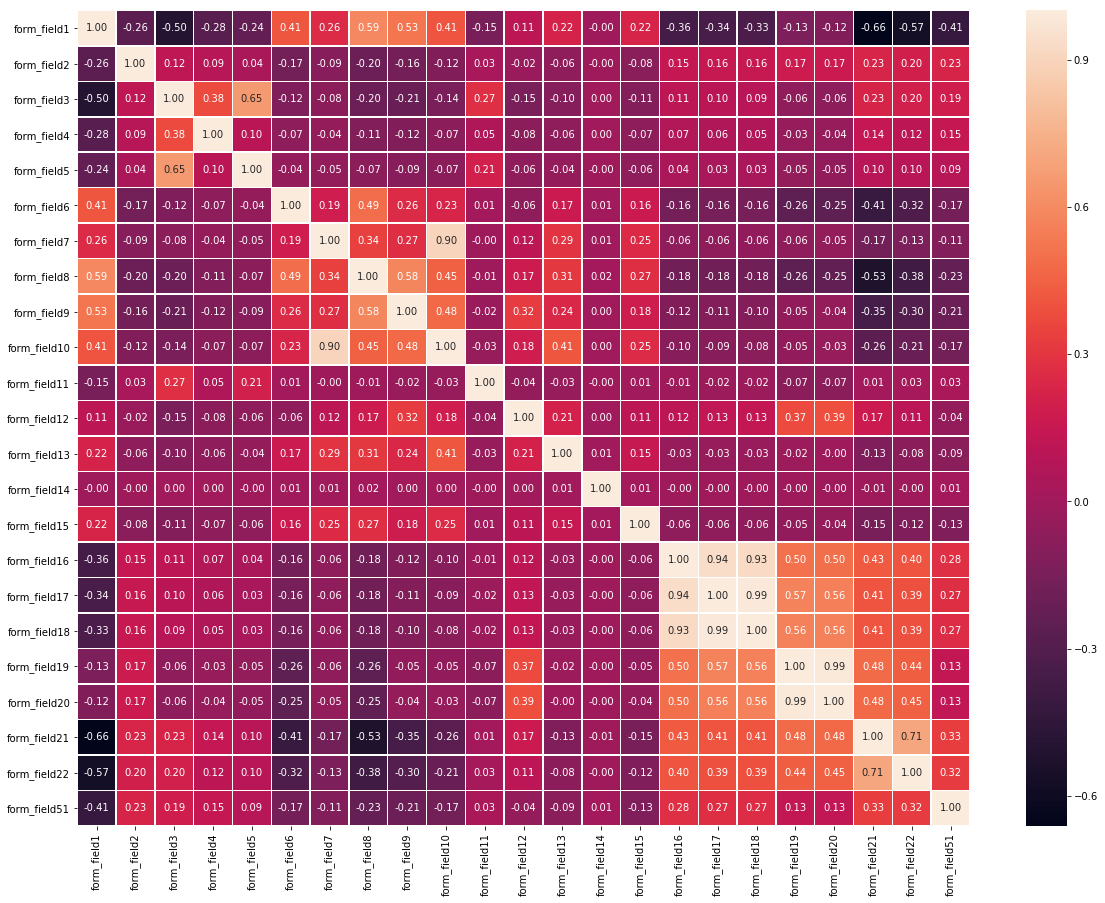

In [24]:
corr_matrix = train_another.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt= ".2f",
                #cmap = "YIGnBu"
                );

In [25]:
train["default_status"].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [27]:
train["form_field47"] = pd.Categorical(train["form_field47"]).codes
train["default_status"] = pd.Categorical(train["default_status"]).codes

In [28]:
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train[label] = content.fillna(content.median())

In [29]:
X = train.drop(["default_status", "Applicant_ID"], axis = 1)
Y = train["default_status"]

In [30]:
bestFeatures = SelectKBest(score_func = chi2, k = 20)
fit = bestFeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(20, 'Score'))

           Specs         Score
13  form_field14  4.081261e+11
9   form_field10  9.675423e+10
8    form_field9  7.008013e+10
14  form_field15  4.934710e+10
12  form_field13  3.923628e+10
6    form_field7  3.776473e+10
7    form_field8  1.503863e+10
49  form_field50  7.637557e+09
5    form_field6  4.967309e+09
10  form_field11  3.002017e+09
11  form_field12  1.776232e+09
47  form_field48  1.547295e+09
27  form_field28  1.133181e+08
25  form_field26  1.634663e+07
28  form_field29  1.370067e+07
21  form_field22  1.025774e+07
26  form_field27  9.278584e+06
22  form_field23  6.961016e+06
24  form_field25  3.278729e+06
31  form_field32  2.862215e+06


[ 0.0662666   0.03664113  0.01892947  0.01255098  0.00925755  0.01438535
  0.01800144  0.01653957  0.01854629  0.02412237  0.02003637  0.01617627
  0.01828963  0.02352012  0.02159029  0.00923525  0.00868472  0.00949502
  0.0142715   0.01385722  0.0200033   0.01796626  0.01839375  0.01586935
  0.02186473  0.01969752  0.0214804   0.04136135  0.02855511  0.01909038
  0.01692191  0.02132803  0.02579785  0.01282851  0.01157442  0.02326135
  0.02211785  0.02561826  0.00767282  0.01251495  0.01383998  0.05371484
  0.02056519  0.02101472  0.00469567  0.01007249  0.03533464  0.01408084
  0.01593839  0.01642802]


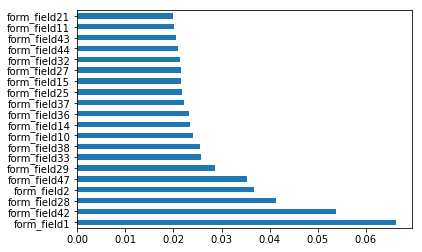

In [31]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

In [32]:
#split data into train and test sets
np.random.seed(42)

#split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2)

In [33]:
#put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(random_state = 0)
         }

#create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data no labels
    Y_train : training labels
    Y_test : test labels
    """
    # set random seed so that results are reproducible
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             Y_train = Y_train,
                             Y_test = Y_test)
model_scores

{'Decision Tree': 0.72008928571428577,
 'KNN': 0.734375,
 'Logistic Regression': 0.76187499999999997,
 'Random Forest': 0.7874107142857143}

In [35]:
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
#setup random seed
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = rf_grid,
                       cv = 5,
                       n_iter = 2,
                      verbose = True)
# Fit random hyperparameter search model for RabdomForestClassifier()
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 13.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=2, n_jobs=1,
          param_distributions={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]), 'max_depth': [None, 3, 5, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=

In [37]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [38]:
#concat 2 dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ["Specs", "Score"]

In [39]:
featureScores

,Specs,Score
0,form_field1,8.812186e+04
1,form_field2,3.425410e+03
2,form_field3,9.158025e+03
3,form_field4,1.420017e+04
4,form_field5,2.489316e+04
5,form_field6,4.967309e+09
6,form_field7,3.776473e+10
7,form_field8,1.503863e+10
8,form_field9,7.008013e+10
9,form_field10,9.675423e+10


In [40]:
#print higest 10
print(featureScores.nlargest(20, "Score"))

           Specs         Score
13  form_field14  4.081261e+11
9   form_field10  9.675423e+10
8    form_field9  7.008013e+10
14  form_field15  4.934710e+10
12  form_field13  3.923628e+10
6    form_field7  3.776473e+10
7    form_field8  1.503863e+10
49  form_field50  7.637557e+09
5    form_field6  4.967309e+09
10  form_field11  3.002017e+09
11  form_field12  1.776232e+09
47  form_field48  1.547295e+09
27  form_field28  1.133181e+08
25  form_field26  1.634663e+07
28  form_field29  1.370067e+07
21  form_field22  1.025774e+07
26  form_field27  9.278584e+06
22  form_field23  6.961016e+06
24  form_field25  3.278729e+06
31  form_field32  2.862215e+06


In [41]:
model = ExtraTreesClassifier()
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
print(model.feature_importances_)

[ 0.0677331   0.03945036  0.02220774  0.0124712   0.00925084  0.01382783
  0.02030526  0.01424833  0.01864753  0.01913495  0.02016528  0.01740448
  0.01914437  0.02291635  0.02137925  0.00799078  0.00844085  0.01012416
  0.01433599  0.01371445  0.01712708  0.01876226  0.01809432  0.01685321
  0.02136125  0.02060545  0.02230672  0.04591164  0.03247668  0.01924705
  0.01763655  0.02101298  0.02515027  0.01256415  0.01148179  0.02403103
  0.0211415   0.02354454  0.00741064  0.01236883  0.01396603  0.04914956
  0.02137222  0.02045899  0.004542    0.00892292  0.03376616  0.01363115
  0.01627386  0.01593608]


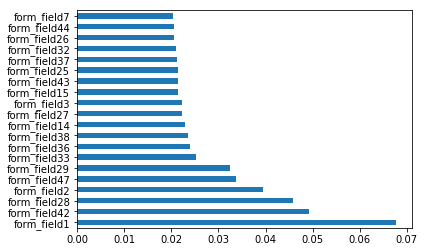

In [43]:
#plot grah
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

In [44]:
#Bagging - gradient
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [45]:
bg.score(X_test, Y_test)

0.79473214285714289

In [46]:
# Boosting = ada boost
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 1)
adb.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=10, random_state=None)

In [47]:
adb.score(X_test, Y_test)

0.75651785714285713

In [48]:
adb.score(X_train, Y_train)

0.9999553571428571

In [49]:
# Voting classifier - multiple model ensemble
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = "poly", degree = 2)

In [50]:
#preprossessing test data
for label, content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test[label] = content.fillna(content.median())

            
test["form_field47"] = pd.Categorical(test["form_field47"]).codes

In [51]:
X_test = test.drop([ "Applicant_ID", "form_field4", "form_field5", "form_field6",
                     "form_field7", "form_field8", "form_field10", "form_field11", "form_field12", "form_field13",
                     "form_field16", "form_field17", "form_field18", "form_field19", "form_field20", "form_field23",
                     "form_field24", "form_field26", "form_field30", "form_field31", "form_field34", "form_field35", 
                     "form_field39", "form_field40", "form_field41", "form_field43", "form_field45", "form_field46",
                     "form_field48", "form_field49", "form_field50", ], axis = 1)


In [53]:
test_preds = rs_rf.predict(X_test)

In [55]:
#format prediction 
df_preds = pd.DataFrame()
df_preds["Applicant_ID"] = test["Applicant_ID"]
df_preds["Default_status"] = test_preds
#df_preds

In [56]:
#Export prediction data
df_preds.to_csv("Test_predictions4.csv", index = False)